In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def import_bls_excel(directory, file_name):
    df = pd.read_excel(directory+file_name,
                  dtype = {'Year': 'Int16'},
                      skiprows=12)
    column = file_name.replace('.xlsx', '')
    df_new = pd.DataFrame(columns=['Year', 'Month', column])
    colnames = list(df.columns)
    colnames.remove('Year')
    for index in df.index:
        row = df.loc[index]
        for col in colnames:
            df_new.loc[len(df_new.index)] = [row['Year'],col,row[col]]
    return df_new.set_index(['Year', 'Month'])

In [3]:
def get_bls_data_merged(path, df_merge):
    for name in os.listdir(path):
        new_df = import_bls_excel(directory=path, file_name=name)
        df_merge = pd.merge(df_merge, new_df, left_index=True, right_index=True, how='left')
    return df_merge

In [4]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dummy_data = []
for i in range(2010, 2021):
    for m in months:
        dummy_data.append([i,m])
df_dummy = pd.DataFrame(data=dummy_data, columns=['Year', 'Month'])
df_dummy.set_index(['Year', 'Month'], inplace=True)

ans = get_bls_data_merged(path='.Data/BLS/Unemployment Level/', df_merge=df_dummy)

C:\Users\ankit\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


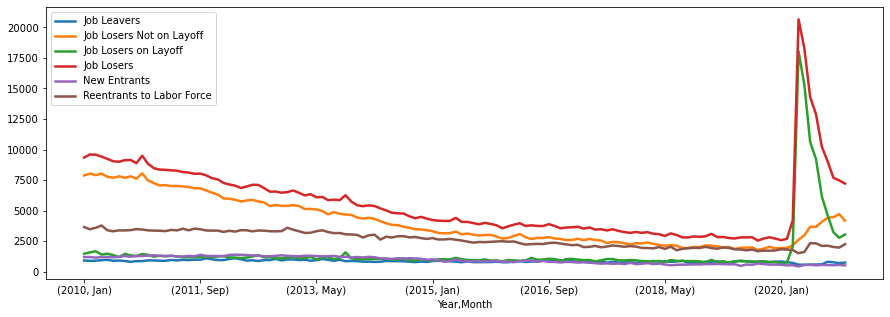

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
ans.plot(figsize=(15, 5), linewidth = 2.5);

Part 2: Unemployed vs Underemployed

In [6]:
df_unemployed = pd.read_excel('.Data/unemployed_vs_underemployed/labor-market-for-recent-college-grads.xlsx', sheet_name='ch1_unemployment', 
                   usecols=['Date', 'Recent graduates', 'College graduates'], skiprows=13, skipfooter=2)
df_unemployed.set_index('Date', inplace = True)

In [7]:
df_underemployed = pd.read_excel('.Data/unemployed_vs_underemployed/labor-market-for-recent-college-grads.xlsx', sheet_name='ch2_underemployment', 
                   usecols=['Date', 'Recent graduates', 'College graduates'], skiprows=13, skipfooter=2)
df_underemployed.set_index('Date', inplace = True)

In [11]:
df_merged = pd.merge(df_unemployed, df_underemployed, left_index=True, right_index=True, how="inner")
df_merged.columns = ['Unemployed Recent Graduates', 'Unemployed College Graduates', 
                     'Underemployed Recent Graduates', 'Underemployed College Graduates']
df_merged.head()

,Unemployed Recent Graduates,Unemployed College Graduates,Underemployed Recent Graduates,Underemployed College Graduates
Date,,,,
1990-01-01,3.381,2.270,42.918,34.082
1990-02-01,3.039,2.206,43.244,34.085
1990-03-01,3.136,2.165,43.284,34.089
1990-04-01,3.565,2.186,44.533,34.215
1990-05-01,3.861,2.198,44.768,34.348


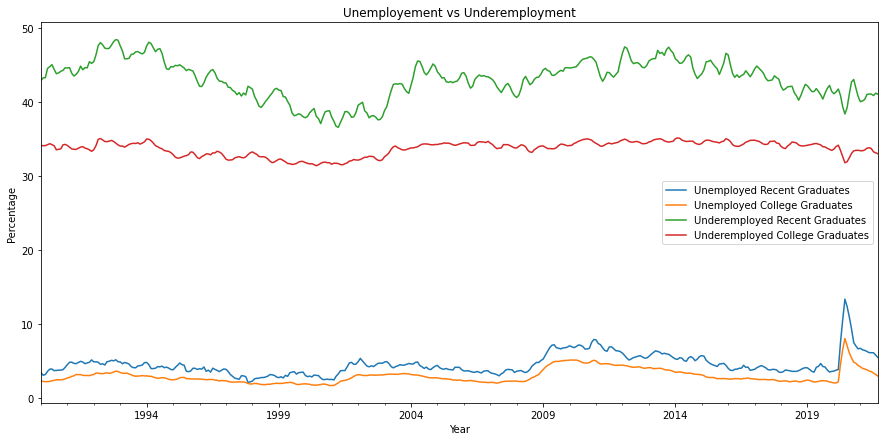

In [9]:
df_merged.plot(figsize=[15, 7], title='Unemployement vs Underemployment').set(xlabel='Year', ylabel='Percentage');